Hello James!

My name is Olga. I'm happy to review your project today. 

When I will see mistake at the first time, I will just point it out. I let you find it and fix it by yourself. I'm trying to prepare you to work as an Data Analyst. SO, at a real job, your team lead will do the same. But if you can't handle this task yet, I will give you a more accurate hint at the next iteration.

You will find my comments below - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Success. Everything is done succesfully.
</div>


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Remarks. Some recommendations.
</div>


<div class="alert alert-block alert-danger">
    
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
    
Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>


You can answer me by using this: 

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

Hello James! Thank you for sending your project. You've done a really good job on it! You plot a good graphs and very detailed comments.
    
Your project has been accepted and you can go to the next sprint! Congratulations!
    
Keep up the good work, and good luck on the next sprint! :) 
    
</div>

# Step 4 Exploratory Data Analysis in Python

## Table of Contents
1. Table of Contents
2. Introduction
3. Importing Libraries
4. Data Acquisition & Description
5. Data Pre-Processing
6. Data Analysis
7. Regional User Profiles
8. Hypothesis Testing
9. Conclusion 


## Introduction
This section will introduce the purpose and objectives of your analysis
Project description
You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.
Working with a database, you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.


## Importing Libraries
In this section, we import the necessary libraries for data manipulation, analysis, and visualization. These libraries provide a range of functions that facilitate our exploratory data analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as st

## Data Acquisition & Description

In [2]:
company = pd.read_csv('/datasets/project_sql_result_01.csv')
location = pd.read_csv('/datasets/project_sql_result_04.csv')
weather = pd.read_csv('/datasets/project_sql_result_07.csv')

Column Non-Null Count Dtype

In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


checking column names

In [4]:
company.columns

Index(['company_name', 'trips_amount'], dtype='object')

In [5]:
company.tail()
company.head()

company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

creating top 15

In [6]:
company.sample( 15)

company_name  trips_amount
24                   Chicago Taxicab          1014
45         3011 - 66308 JBL Cab Inc.            25
19     Chicago Medallion Leasing INC          1607
0                          Flash Cab         19558
54         2192 - 73487 Zeymane Corp            14
11                        Globe Taxi          4383
35       6742 - 83735 Tasha Ride Inc            39
50      2823 - 73307 Lee Express Inc            15
28                       5 Star Taxi           310
13         Nova Taxi Affiliation Llc          3175
49            5074 - 54002 Ahzmi Inc            16
33                  Metro Jet Taxi A           146
44        2092 - 61288 Sbeih Company            27
31  American United Taxi Affiliation           210
34                      Norshore Cab           127

In [7]:
company.describe()

trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

In [8]:
company.shape

(64, 2)

In [9]:
len(company.company_name.unique())

64

In [10]:
company.duplicated().sum()

0

In [11]:
company.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [12]:
location.dropoff_location_name.unique()
len(location.dropoff_location_name.unique())

94

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done! We have our datasets and checked them. Also we should add conclusion for this part.
</div>

Identifying Top 10 Neighborhoods for Drop-offs
1. Analyze the second dataset to identify the top 10 neighborhoods in terms of average drop-offs.

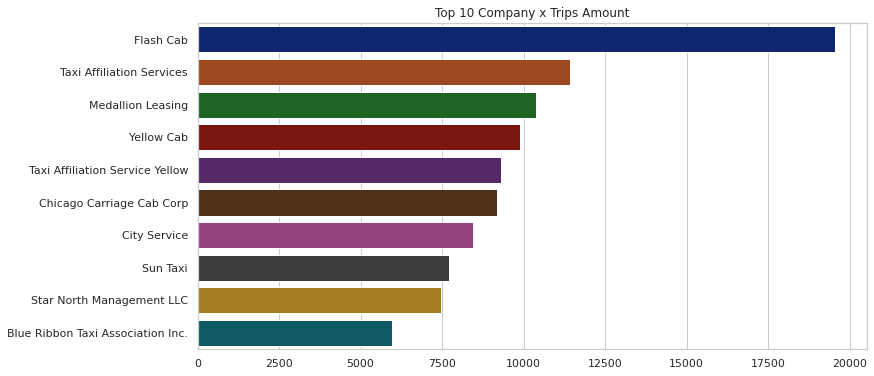

In [13]:
# top 10 destination
top10_company = company.sort_values(by='trips_amount', ascending=False).head(10)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=top10_company, palette='dark')
plt.title('Top 10 Company x Trips Amount')
plt.xlabel('')
plt.ylabel('')
plt.show()

Overview of company:

No nulls and no duplicates
Data in the ideal format
Large difference between mean and median in trips_amount
The company "Flash Cab" has excellent performance

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Very good! Thank you for sorted values for graph. It makes it more understandble.
    
Yes, flash cab is a best here. Perhaps, because of Flash or number of trips. :)
</div>

In [14]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [15]:
location.columns

Index(['dropoff_location_name', 'average_trips'], dtype='object')

In [16]:
location.shape

(94, 2)

In [17]:
location.tail()
location.head()

dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

In [18]:
location.describe()

average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667

In [19]:
location.duplicated().sum()

0

In [20]:
location.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [21]:
location.dropoff_location_name.unique()
len(location.dropoff_location_name.unique())

94

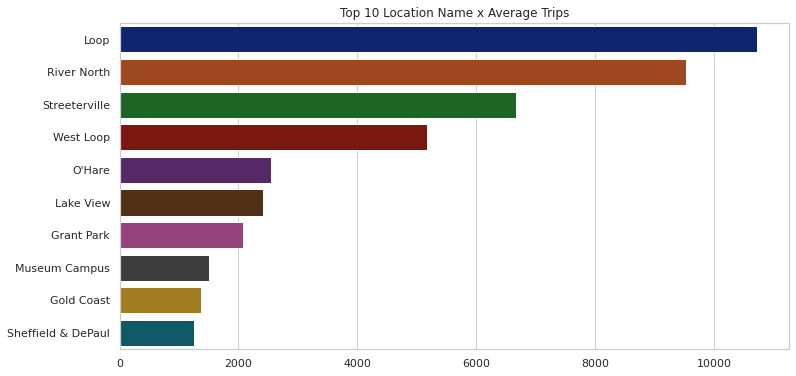

In [22]:
# Top 10 Destination
top10_location = location.sort_values(by='average_trips', ascending=False).head(10)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top10_location, palette='dark')
plt.title('Top 10 Location Name x Average Trips')
plt.xlabel('')
plt.ylabel('')
plt.show()

Overview of location:
1. Again, no nulls and no duplicates.
2. We plotted a graph to better visualize the top 10 destinations.
3. Trips to the "River North", "Streeterville", and "Loop" regions have the highest trip averages.
4. The term "Loop" refers to the area of the city's business district, which often caters to the central area, including many.
5. offices, hotels, restaurants, tourist attractions, and may be subject to specific regulations and tariffs

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Perhaps, those neighborhoods are in city center or they have some popular places. :)

</div>

In [23]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [24]:
weather.columns

Index(['start_ts', 'weather_conditions', 'duration_seconds'], dtype='object')

In [25]:
weather.describe()

duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000

In [26]:
weather.start_ts.dtypes

dtype('O')

In [27]:
weather['start_ts'] = pd.to_datetime(weather['start_ts'])

In [28]:
weather.tail()
weather.head()

start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 07:00:00               Good            1440.0

In [29]:
weather.weather_conditions.unique()

array(['Good', 'Bad'], dtype=object)

In [30]:
weather.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [31]:
weather.duplicated().sum()

197

In [32]:
duplicated = weather[weather.duplicated(keep=False)]
duplicated

start_ts weather_conditions  duration_seconds
4    2017-11-11 07:00:00               Good            1440.0
8    2017-11-11 14:00:00               Good            2460.0
10   2017-11-18 06:00:00               Good            1500.0
16   2017-11-04 12:00:00               Good            2640.0
23   2017-11-04 14:00:00               Good            3360.0
...                  ...                ...               ...
1054 2017-11-11 07:00:00               Good            1380.0
1058 2017-11-25 12:00:00               Good            1440.0
1062 2017-11-11 06:00:00               Good            1500.0
1065 2017-11-11 13:00:00               Good            2100.0
1066 2017-11-11 08:00:00               Good            1380.0

[312 rows x 3 columns]

In [33]:
duplicated = duplicated.sort_values(by='duration_seconds', ascending=False)
duplicated.head(15)
duplicated.tail(15)

start_ts weather_conditions  duration_seconds
231 2017-11-04 07:00:00               Good            1200.0
835 2017-11-11 10:00:00               Good            1200.0
845 2017-11-11 08:00:00               Good            1200.0
478 2017-11-11 07:00:00               Good            1200.0
462 2017-11-04 05:00:00               Good            1200.0
450 2017-11-11 06:00:00               Good            1200.0
289 2017-11-11 10:00:00               Good            1200.0
913 2017-11-11 08:00:00               Good            1200.0
720 2017-11-11 10:00:00               Good            1200.0
207 2017-11-11 08:00:00               Good            1200.0
541 2017-11-04 05:00:00               Good            1200.0
603 2017-11-11 08:00:00               Good            1140.0
979 2017-11-04 07:00:00               Good            1140.0
71  2017-11-11 08:00:00               Good            1140.0
332 2017-11-04 07:00:00               Good            1140.0

4.3. Creating Graphs
1. Use matplotlib or seaborn for visualization.
2. Create a bar graph for the number of rides for each taxi company from the first dataset.
3. Create a bar graph for the top 10 neighborhoods by number of drop-offs from the second dataset.

In [34]:
len(duplicated) / weather.shape[0]

0.29213483146067415

In [35]:
weather = weather.drop_duplicates()

In [36]:
df_duration_seconds_equal_zero = weather.loc[ weather['duration_seconds'] == 0]
df_duration_seconds_equal_zero

start_ts weather_conditions  duration_seconds
163  2017-11-11 09:00:00               Good               0.0
168  2017-11-11 07:00:00               Good               0.0
204  2017-11-18 19:00:00               Good               0.0
552  2017-11-04 01:00:00               Good               0.0
801  2017-11-04 09:00:00               Good               0.0
1063 2017-11-25 11:00:00               Good               0.0

In [37]:
weather = weather[weather['duration_seconds'] != 0]

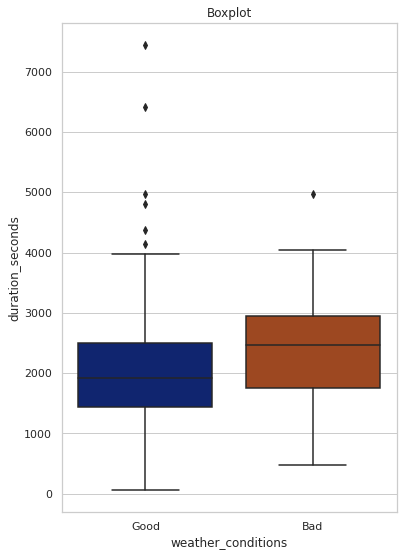

In [38]:
df_bad = weather[weather['weather_conditions'] == 'Bad']
df_good = weather[weather['weather_conditions'] == 'Good']

# plotando
sns.set(style="whitegrid", palette="dark")
plt.figure(figsize=(6, 9))
plt.title('Boxplot')
plt.xlabel('')
plt.ylabel('')
sns.boxplot(x='weather_conditions', y='duration_seconds', data=weather, palette="dark")
plt.show()

Overview of df_location:

1. again with no nulls, but with duplicated data
2. duplicates represented almost 30% of the dataframe
3. we changed the start_ts column to datetime
4. mean and median closer in the duration_seconds column, but with a significant standard deviation
5. weather_conditions column with only 2 unique values: 'Good' and 'Bad'
6. we removed from the dataframe where the 'race' duration time was 0 seconds
7. we identified outliers and some more insights with the generation of boxplots

In [39]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [40]:
mean_value = company['trips_amount'].mean()
median_value = company['trips_amount'].median()
variance_value = company['trips_amount'].var()
std_deviation_value = company['trips_amount'].std()

In [41]:
print(f'Data from company in the trips_amount column:')
print(f'mean -> {round(mean_value, 2)}')
print(f'median -> {round(median_value, 2)}')
print(f'variance -> {round(variance_value, 2)}')
print(f'standard deviation -> {round(std_deviation_value, 2)}')

Data from company in the trips_amount column:
mean -> 2145.48
median -> 178.5
variance -> 14533708.95
standard deviation -> 3812.31


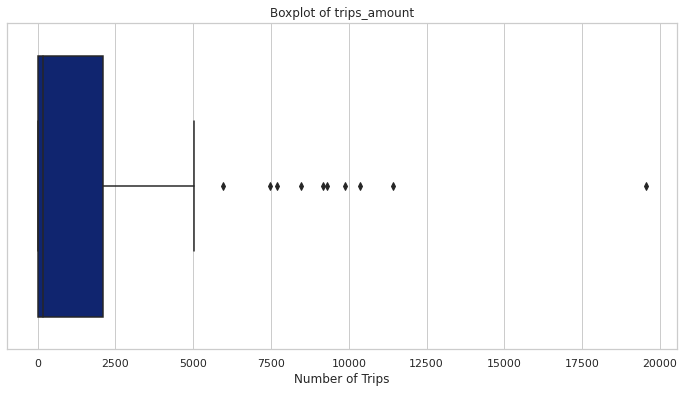

In [42]:
sns.set(style="whitegrid", palette="dark")
plt.figure(figsize=(12, 6))
sns.boxplot(data=company, x='trips_amount')
plt.title('Boxplot of trips_amount')
plt.xlabel('Number of Trips')
plt.show()

In [43]:
Q1 = company['trips_amount'].quantile(0.25)
Q3 = company['trips_amount'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

company_without_outliers = company[(company['trips_amount'] >= lower_limit) & (company['trips_amount'] <= upper_limit)]

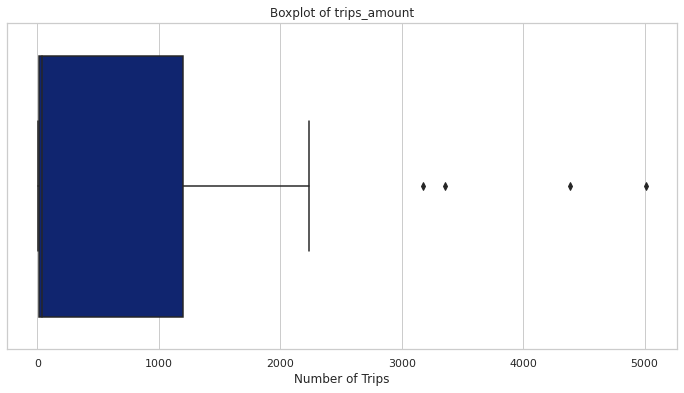

In [44]:
sns.set(style="whitegrid", palette="dark")
plt.figure(figsize=(12, 6))
sns.boxplot(data=company_without_outliers, x='trips_amount')
plt.title('Boxplot of trips_amount')
plt.xlabel('Number of Trips')
plt.show()

In [45]:

quartiles = company_without_outliers['trips_amount'].quantile([0, 0.25, 0.5, 0.75, 1])
labels = ['Q4', 'Q3', 'Q2', 'Q1']
company_without_outliers['quartile'] = pd.cut(company_without_outliers['trips_amount'], bins=quartiles, labels=labels)

/tmp/ipykernel_214/1452484711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_without_outliers['quartile'] = pd.cut(company_without_outliers['trips_amount'], bins=quartiles, labels=labels)


In [46]:
company_without_outliers.info()
company_without_outliers.head()
company_without_outliers = company_without_outliers.fillna("Q4")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 10 to 63
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   company_name  54 non-null     object  
 1   trips_amount  54 non-null     int64   
 2   quartile      53 non-null     category
dtypes: category(1), int64(1), object(1)
memory usage: 1.5+ KB


In [47]:
q1 = company_without_outliers.loc[company_without_outliers['quartile'] == 'Q1']
q2 = company_without_outliers.loc[company_without_outliers['quartile'] == 'Q2']
q3 = company_without_outliers.loc[company_without_outliers['quartile'] == 'Q3']
q4 = company_without_outliers.loc[company_without_outliers['quartile'] == 'Q4']

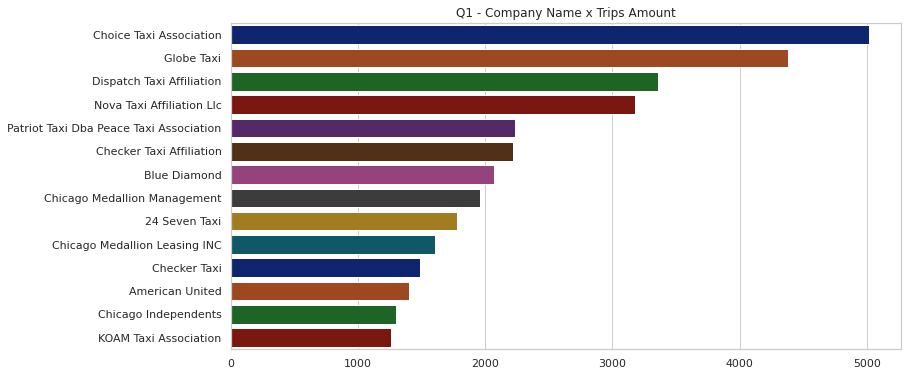

In [48]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=q1, palette='dark')
plt.title('Q1 - Company Name x Trips Amount')
plt.xlabel('')
plt.ylabel('')
plt.show()

Half of the companies can easily exceed 2000 rides in the Q1 group.

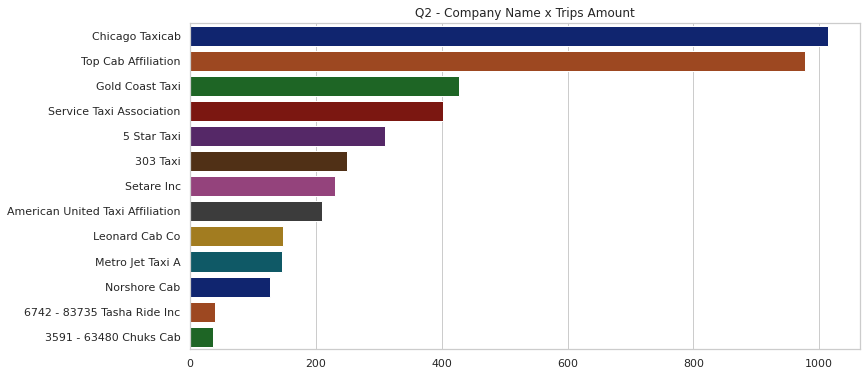

In [49]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=q2, palette='dark')
plt.title('Q2 - Company Name x Trips Amount')
plt.xlabel('')
plt.ylabel('')
plt.show()

Chicago Taxicab in 1st place with almost 1000 rides in Q2.

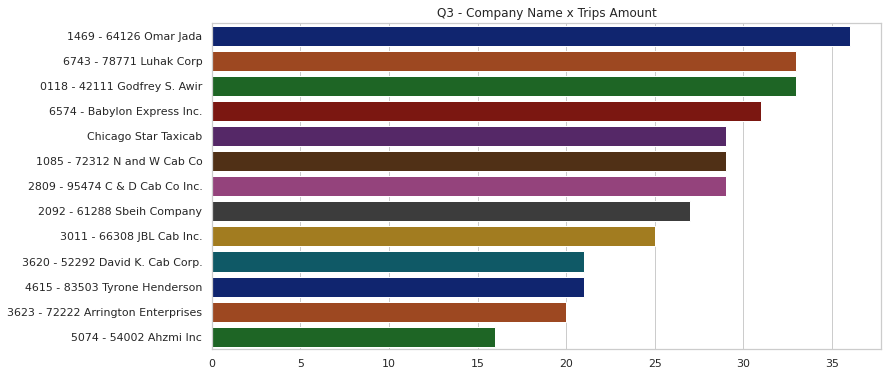

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=q3, palette='dark')
plt.title('Q3 - Company Name x Trips Amount')
plt.xlabel('')
plt.ylabel('')
plt.show()

In Q3, more individual and smaller drivers start to appear, but with the number of rides much lower than in Q1 and Q2.

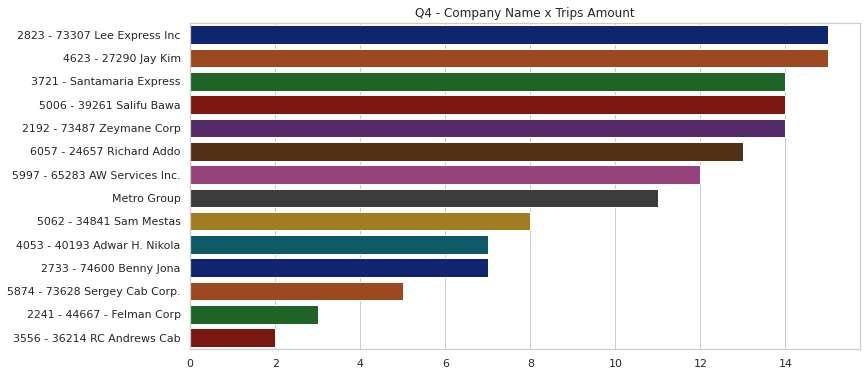

In [51]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=q4, palette='dark')
plt.title('Q4 - Company Name x Trips Amount')
plt.xlabel('')
plt.ylabel('')
plt.show()

Once again, we arrive at the same conclusion as Q3 here in Q4.

In [52]:
grouped = company_without_outliers.groupby('quartile')['trips_amount'].agg(['sum', 'mean', 'median', 'std', 'var'])
grouped = grouped.sort_values(by='mean', ascending=False).reset_index()
grouped

quartile    sum         mean  median          std           var
0       Q1  33231  2373.642857  2012.5  1176.991838  1.385310e+06
1       Q2   4318   332.153846   230.0   317.906130  1.010643e+05
2       Q3    350    26.923077    29.0     5.964639  3.557692e+01
3       Q4    140    10.000000    11.5     4.574175  2.092308e+01

In [53]:
fig = px.treemap(grouped, path=['quartile'], values='sum', color_discrete_sequence=px.colors.sequential.RdBu, width=888, height=444, title='Treemap - Sum of Number of Trips by Quartile (Q1, Q2, Q3, and Q4)')
fig.show()

In [54]:
filtered1 = company['company_name'].str.contains('association|affiliation', case=False)
companies_filtered1 = company[filtered1]

# df_company_without_outliers
filtered2 = company_without_outliers['company_name'].str.contains('association|affiliation', case=False)
companies_filtered2 = company_without_outliers[filtered2]

In [55]:
prop1 = companies_filtered1.trips_amount.sum() / company.trips_amount.sum()
print(f'Companies with "association/affiliation" in their names account for {round(prop1, 3) * 100}% of the total number of trips in the original DataFrame.')

prop2 = companies_filtered2.trips_amount.sum() / company_without_outliers.trips_amount.sum()
print(f'Companies with "association/affiliation" in their names account for {round(prop2, 3) * 100}% of the total number of trips in the DataFrame without outliers.')

Companies with "association/affiliation" in their names account for 33.2% of the total number of trips in the original DataFrame.
Companies with "association/affiliation" in their names account for 49.5% of the total number of trips in the DataFrame without outliers.


Overview of company:

Again without nulls, but with duplicated data
We identified very strong potential competitors, associations, and affiliations
We had outliers and addressed them

In [56]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [57]:
mean_value = location['average_trips'].mean()
median_value = location['average_trips'].median()
variance_value = location['average_trips'].var()
std_deviation_value = location['average_trips'].std()

In [58]:
location_t10 = location.sort_values(by='average_trips', ascending=False)
location_t10 = location_t10.head(10)

In [59]:
print(f'Data from location in the average_trips column:')
print(f'mean -> {round(mean_value, 2)}')
print(f'median -> {round(median_value, 2)}')
print(f'variance -> {round(variance_value, 2)}')
print(f'standard deviation -> {round(std_deviation_value, 2)}')

Data from location in the average_trips column:
mean -> 599.95
median -> 52.02
variance -> 2939822.63
standard deviation -> 1714.59


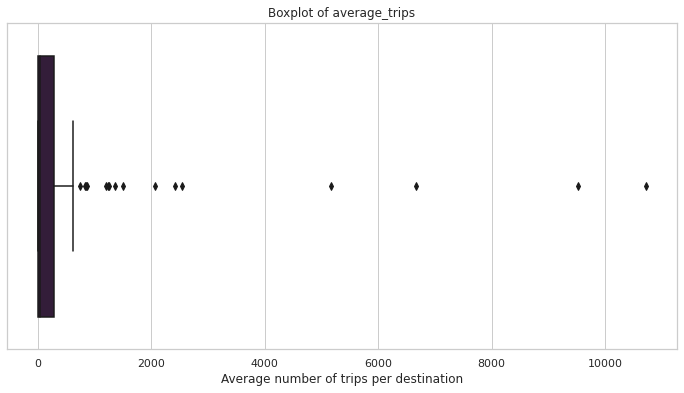

In [60]:
sns.set(style="whitegrid", palette="rocket")
plt.figure(figsize=(12, 6))
sns.boxplot(data=location, x='average_trips')
plt.title('Boxplot of average_trips')
plt.xlabel('Average number of trips per destination')
plt.show()

In [61]:
Q1 = location['average_trips'].quantile(0.25)
Q3 = location['average_trips'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
location_without_outliers = location[(location['average_trips'] >= lower_limit) & (location['average_trips'] <= upper_limit)]

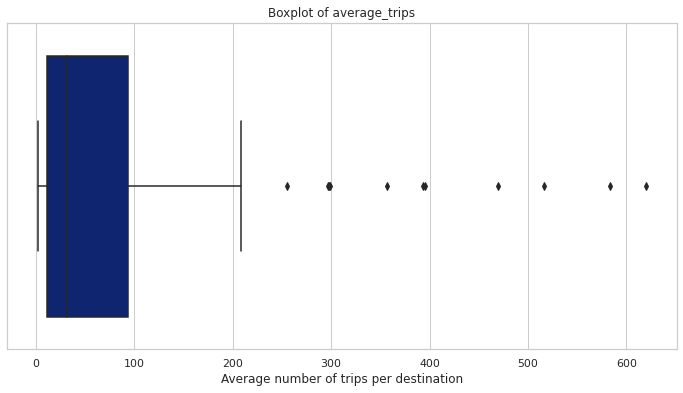

In [62]:
sns.set(style="whitegrid", palette="dark")
plt.figure(figsize=(12, 6))
sns.boxplot(data=location_without_outliers, x='average_trips')
plt.title('Boxplot of average_trips')
plt.xlabel('Average number of trips per destination')
plt.show()

In [63]:
quartiles = location_without_outliers['average_trips'].quantile([0, 0.25, 0.5, 0.75, 1])
labels = ['Q4', 'Q3', 'Q2', 'Q1']
location_without_outliers_copy = location_without_outliers.copy()
location_without_outliers_copy.loc[:, 'quartile'] = pd.cut(location_without_outliers_copy['average_trips'], bins=quartiles, labels=labels)

In [64]:
location_without_outliers.info()
location_without_outliers.tail()
location_without_outliers = location_without_outliers.fillna("Q4")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 16 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  78 non-null     object 
 1   average_trips          78 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [65]:
quartiles = location_without_outliers['average_trips'].quantile([0, 0.25, 0.5, 0.75, 1])
labels = ['Q4', 'Q3', 'Q2', 'Q1']
location_without_outliers['quartile'] = pd.cut(location_without_outliers['average_trips'], bins=quartiles, labels=labels)
if 'quartile' in location_without_outliers.columns:
    q1 = location_without_outliers.loc[location_without_outliers['quartile'] == 'Q1']
    q2 = location_without_outliers.loc[location_without_outliers['quartile'] == 'Q2']
    q3 = location_without_outliers.loc[location_without_outliers['quartile'] == 'Q3']
    q4 = location_without_outliers.loc[location_without_outliers['quartile'] == 'Q4']
else:
    print("Quartile column not found in the DataFrame.")

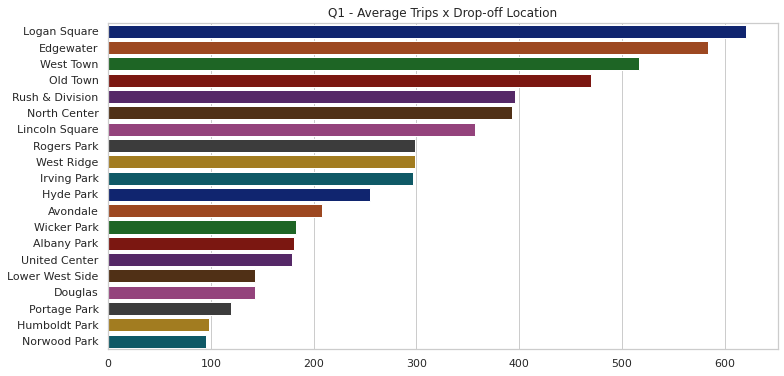

In [66]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=q1, palette='dark')
plt.title('Q1 - Average Trips x Drop-off Location')
plt.xlabel('')
plt.ylabel('')
plt.show()


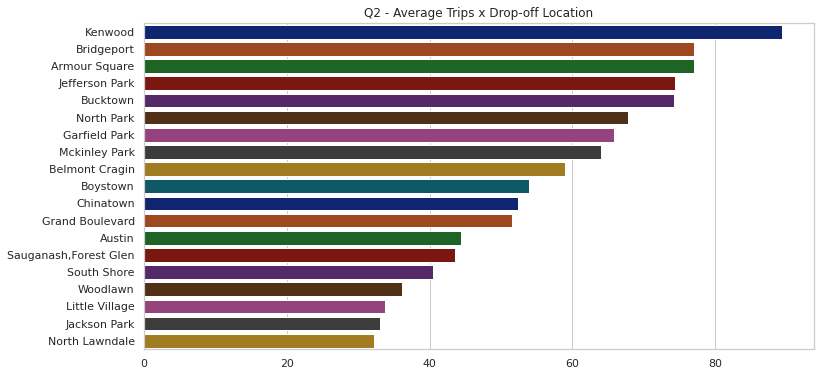

In [67]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=q2, palette='dark')
plt.title('Q2 - Average Trips x Drop-off Location')
plt.xlabel('')
plt.ylabel('')
plt.show()


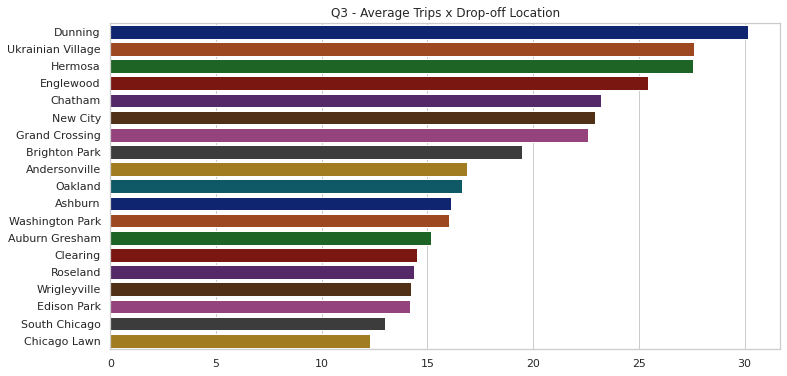

In [68]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=q3, palette='dark')
plt.title('Q3 - Average Trips x Drop-off Location')
plt.xlabel('')
plt.ylabel('')
plt.show()


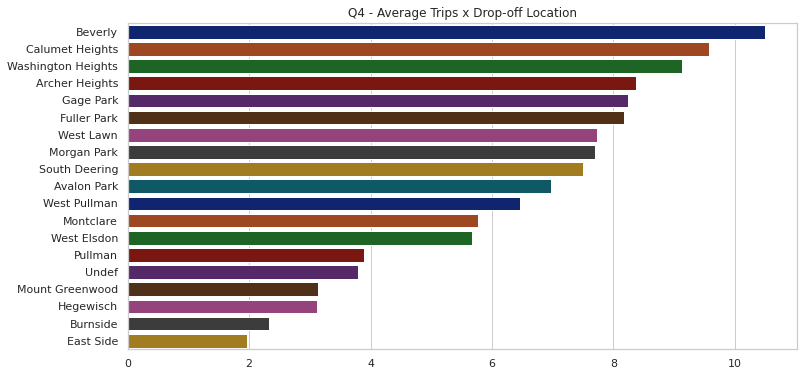

In [69]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=q4, palette='dark')
plt.title('Q4 - Average Trips x Drop-off Location')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [70]:
grouped = location_without_outliers.groupby('quartile')['average_trips'].agg(['sum', 'mean', 'median', 'std', 'var'])
grouped = grouped.sort_values(by='mean', ascending=False).reset_index()
grouped

quartile          sum        mean      median         std           var
0       Q1  5833.866667  291.693333  275.850000  161.525484  26090.481942
1       Q2  1070.570115   56.345796   53.966667   17.513670    306.728651
2       Q3   362.333333   19.070175   16.633333    5.630417     31.701592
3       Q4   120.013668    6.316509    6.966667    2.594316      6.730476

In [71]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            865 non-null    datetime64[ns]
 1   weather_conditions  865 non-null    object        
 2   duration_seconds    865 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 59.3+ KB


In [72]:
weather.head()

start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 07:00:00               Good            1440.0

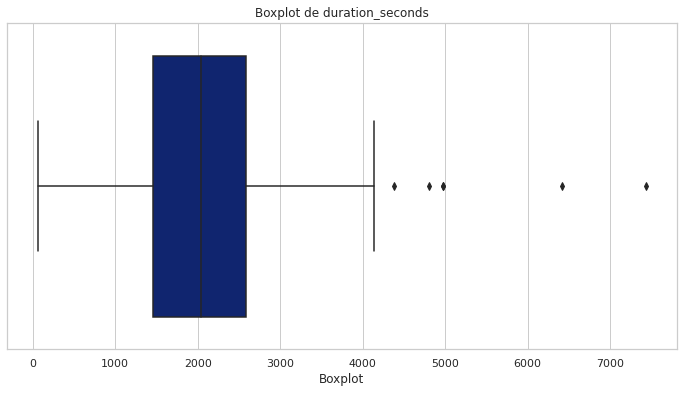

In [73]:
sns.set(style="whitegrid", palette="dark")
plt.figure(figsize=(12, 6))
sns.boxplot(data=weather, x='duration_seconds')
plt.title('Boxplot de duration_seconds')
plt.xlabel('Boxplot')
plt.show()

In [74]:
Q1 = weather['duration_seconds'].quantile(0.25)
Q3 = weather['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
weather_without_outliers = weather[(weather['duration_seconds'] >= lower_limit) & (weather['duration_seconds'] <= upper_limit)]

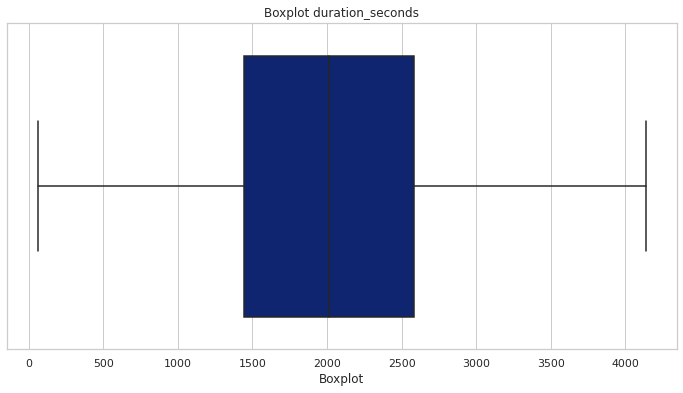

In [75]:
sns.set(style="whitegrid", palette="dark")
plt.figure(figsize=(12, 6))
sns.boxplot(data=weather_without_outliers, x='duration_seconds')
plt.title('Boxplot duration_seconds')
plt.xlabel('Boxplot')
plt.show()

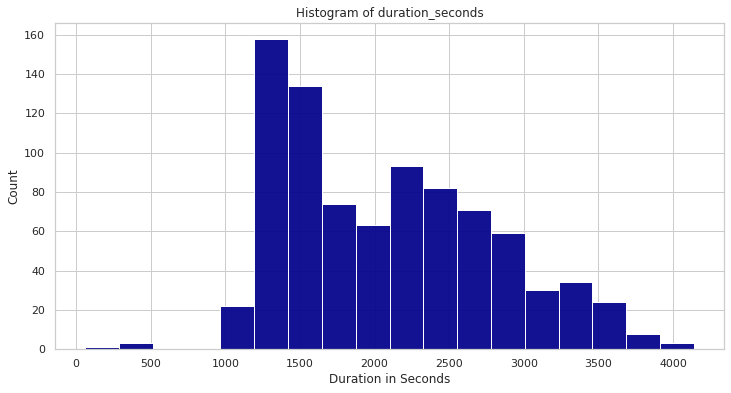

In [76]:
plt.figure(figsize=(12, 6))
sns.histplot(data=weather_without_outliers, x='duration_seconds', color='darkblue', alpha=0.93)
plt.title('Histogram of duration_seconds')
plt.xlabel('Duration in Seconds')
plt.show()

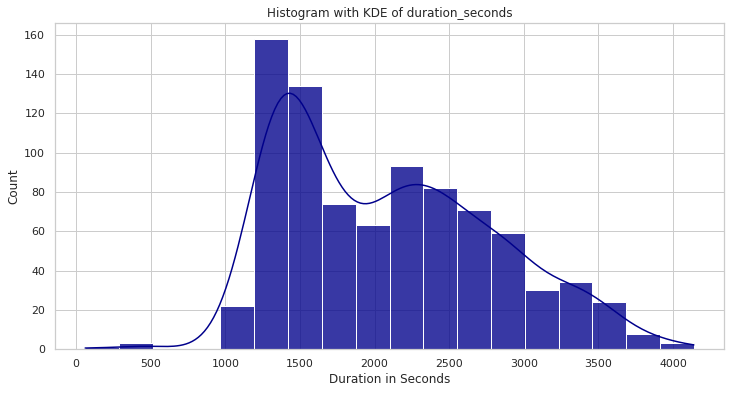

In [77]:
plt.figure(figsize=(12, 6))
sns.histplot(data=weather_without_outliers, x='duration_seconds', color='darkblue', alpha=0.78, kde=True)
plt.title('Histogram with KDE of duration_seconds')
plt.xlabel('Duration in Seconds')
plt.show()


In [78]:
grouped_weather_condition = weather_without_outliers.groupby('weather_conditions')['duration_seconds'].agg(['mean', 'median', 'sum'])
grouped_weather_condition

mean  median        sum
weather_conditions                                
Bad                 2391.741497  2460.0   351586.0
Good                2024.296348  1896.0  1441299.0

We notice that when the weather conditions are bad, the average and median duration of trips are longer. On the other hand, in the overall sum, people travel more when the weather is good.

In [79]:
weather_wo_outliers_copy = weather_without_outliers.copy()
weather_wo_outliers_copy['date'] = weather_wo_outliers_copy['start_ts'].dt.date
weather_wo_outliers_copy['date'] = pd.to_datetime(weather_wo_outliers_copy['date'])
weather_wo_outliers_copy['day'] = weather_wo_outliers_copy['date'].dt.day
weather_wo_outliers_copy.drop('date', axis=1, inplace=True)

Creating a copy and avoiding copywarning. Transforming and simplifying

In [80]:
weather_without_outliers['start_ts'] = pd.to_datetime(weather_without_outliers['start_ts'])
weather_without_outliers['hour'] = weather_without_outliers['start_ts'].dt.hour
weather_without_outliers['day'] = weather_without_outliers['start_ts'].dt.day

unique_hours = weather_without_outliers.hour.unique()
unique_days = weather_without_outliers.day.unique()

print("Unique Hours:", unique_hours)
print("Unique Days:", unique_days)

Unique Hours: [16 14 12 10  7  4 11  6  8 13 20 17  9  5 19 18 15 21  3 22  0  2 23]
Unique Days: [25  4 11 18]


/tmp/ipykernel_214/3388928047.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_214/3388928047.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_214/3388928047.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
print("Good Weather Condition Trips Statistics:")
print(df_good['duration_seconds'].describe())

print("\nBad Weather Condition Trips Statistics:")
print(df_bad['duration_seconds'].describe())

print("\nProportion of Good Weather Condition Trips:")
print(len(df_good) / len(weather_without_outliers))

print("Proportion of Bad Weather Condition Trips:")
print(len(df_bad) / len(weather_without_outliers))

Good Weather Condition Trips Statistics:
count     717.000000
mean     2049.259414
std       753.877274
min        60.000000
25%      1440.000000
50%      1916.000000
75%      2493.000000
max      7440.000000
Name: duration_seconds, dtype: float64

Bad Weather Condition Trips Statistics:
count     148.000000
mean     2409.229730
std       751.544705
min       480.000000
25%      1746.000000
50%      2463.500000
75%      2940.000000
max      4980.000000
Name: duration_seconds, dtype: float64

Proportion of Good Weather Condition Trips:
0.8346915017462165
Proportion of Bad Weather Condition Trips:
0.17229336437718276


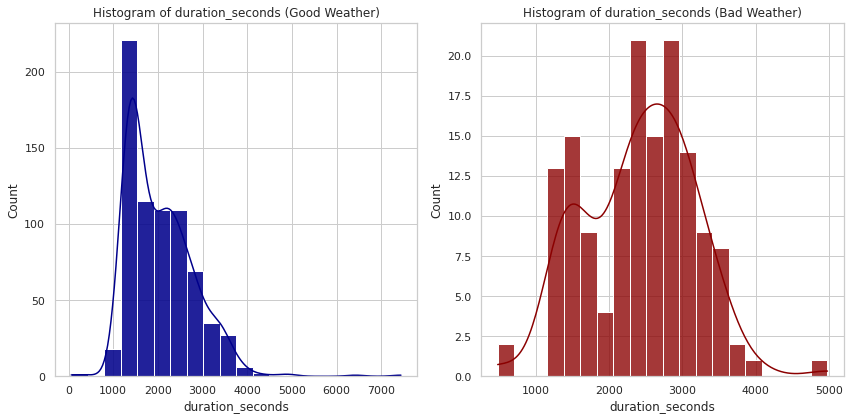

In [82]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
sns.histplot(data=df_good, x="duration_seconds", bins=20, color='darkblue', alpha=0.87, kde=True)
plt.title("Histogram of duration_seconds (Good Weather)")

plt.subplot(1, 2, 2)  
sns.histplot(data=df_bad, x="duration_seconds", bins=20, color='darkred', alpha=0.78, kde=True)
plt.title("Histogram of duration_seconds (Bad Weather)")
plt.tight_layout()
plt.show()


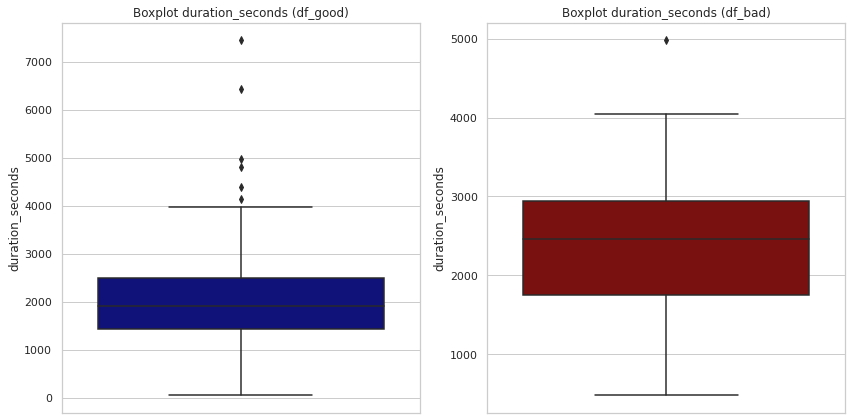

In [83]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_good, y="duration_seconds", color='darkblue')
plt.title("Boxplot duration_seconds (df_good)")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_bad, y="duration_seconds", color='darkred')
plt.title("Boxplot duration_seconds (df_bad)")

plt.tight_layout()
plt.show()

/tmp/ipykernel_214/518915460.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_214/518915460.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



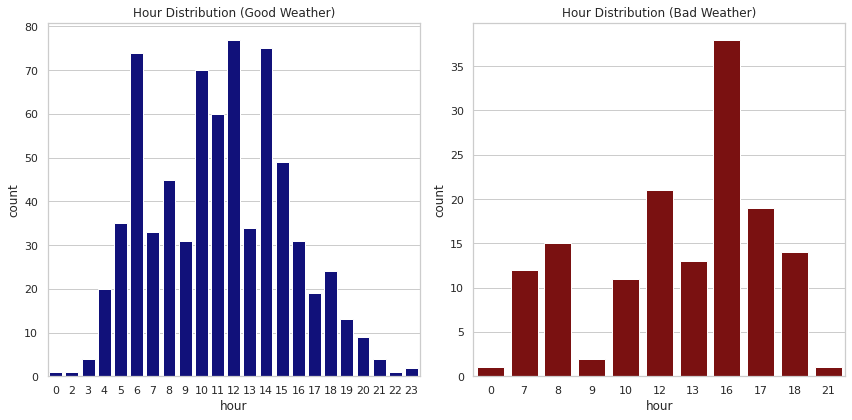

In [84]:
weather_without_outliers['start_ts'] = pd.to_datetime(weather_without_outliers['start_ts'])
weather_without_outliers['hour'] = weather_without_outliers['start_ts'].dt.hour

df_good = weather_without_outliers[weather_without_outliers['weather_conditions'] == 'Good']
df_bad = weather_without_outliers[weather_without_outliers['weather_conditions'] == 'Bad']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df_good, x="hour", color="darkblue")
plt.title("Hour Distribution (Good Weather)")

plt.subplot(1, 2, 2)
sns.countplot(data=df_bad, x="hour", color="darkred")
plt.title("Hour Distribution (Bad Weather)")

plt.tight_layout()
plt.show()

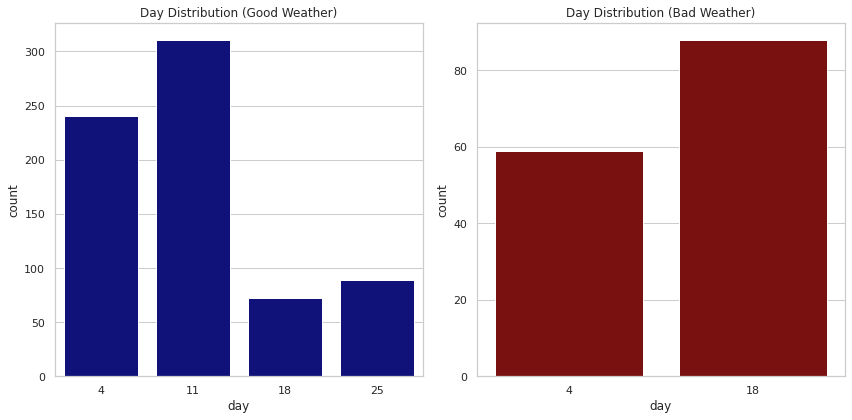

In [85]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df_good, x="day", color="darkblue")
plt.title("Day Distribution (Good Weather)")

plt.subplot(1, 2, 2)
sns.countplot(data=df_bad, x="day", color="darkred")
plt.title("Day Distribution (Bad Weather)")

plt.tight_layout()
plt.show()

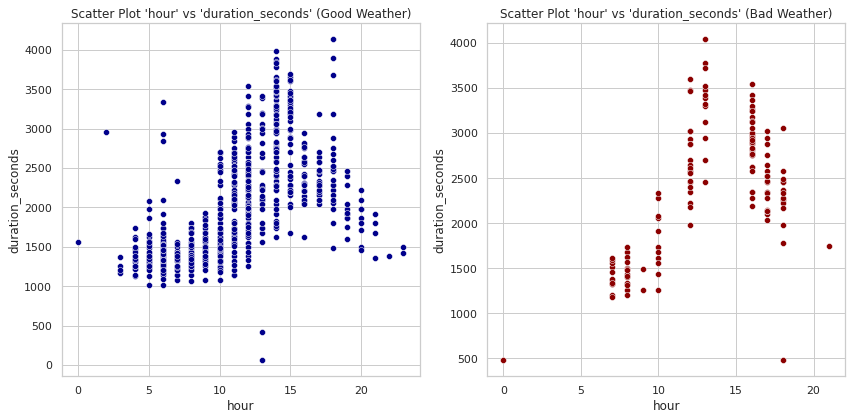

In [86]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_good, x="hour", y="duration_seconds", color="darkblue")
plt.title("Scatter Plot 'hour' vs 'duration_seconds' (Good Weather)")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_bad, x="hour", y="duration_seconds", color="darkred")
plt.title("Scatter Plot 'hour' vs 'duration_seconds' (Bad Weather)")

plt.tight_layout()
plt.show()

In [87]:
weather_without_outliers['weather_conditions'] = weather_without_outliers['weather_conditions'].replace({'Good': 1, 'Bad': 0})

/tmp/ipykernel_214/1187676591.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
weather_without_outliers.head()


start_ts  weather_conditions  duration_seconds  hour  day
0 2017-11-25 16:00:00                   1            2410.0    16   25
1 2017-11-25 14:00:00                   1            1920.0    14   25
2 2017-11-25 12:00:00                   1            1543.0    12   25
3 2017-11-04 10:00:00                   1            2512.0    10    4
4 2017-11-11 07:00:00                   1            1440.0     7   11

In [89]:
correlation_matrix = weather_without_outliers[['hour', 'duration_seconds']].corr()
print(correlation_matrix)

                      hour  duration_seconds
hour              1.000000          0.595145
duration_seconds  0.595145          1.000000


In [90]:
df_bad.info()
print()
df_bad.head()
print()
df_good.info()
print()
df_good.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 6 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            147 non-null    datetime64[ns]
 1   weather_conditions  147 non-null    object        
 2   duration_seconds    147 non-null    float64       
 3   hour                147 non-null    int64         
 4   day                 147 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 11.0+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 1064
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            712 non-null    datetime64[ns]
 1   weather_conditions  712 non-null    object        
 2   duration_seconds    712 non-null    float64       
 3   hour                712 non-n

start_ts weather_conditions  duration_seconds  hour  day
0 2017-11-25 16:00:00               Good            2410.0    16   25
1 2017-11-25 14:00:00               Good            1920.0    14   25
2 2017-11-25 12:00:00               Good            1543.0    12   25
3 2017-11-04 10:00:00               Good            2512.0    10    4
4 2017-11-11 07:00:00               Good            1440.0     7   11

In [91]:
mean_duration_good = df_good['duration_seconds'].mean()
median_duration_good = df_good['duration_seconds'].median()
std_duration_good = df_good['duration_seconds'].std()
var_duration_good = df_good['duration_seconds'].var()

print('Weather Good')
print("Mean:", mean_duration_good)
print("Median:", median_duration_good)
print("Standard Deviation:", std_duration_good)
print("Variance:", var_duration_good)
print()

mean_duration_bad = df_bad['duration_seconds'].mean()
median_duration_bad = df_bad['duration_seconds'].median()
std_duration_bad = df_bad['duration_seconds'].std()
var_duration_bad = df_bad['duration_seconds'].var()

print('Weather Bad')
print("Mean:", mean_duration_bad)
print("Median:", median_duration_bad)
print("Standard Deviation:", std_duration_bad)
print("Variance:", var_duration_bad)

Weather Good
Mean: 2024.2963483146068
Median: 1896.0
Standard Deviation: 688.1860688501046
Variance: 473600.0653593609

Weather Bad
Mean: 2391.7414965986395
Median: 2460.0
Standard Deviation: 723.2661846195931
Variance: 523113.9738141833


In [92]:
sample_bad = df_bad['duration_seconds']
sample_good = df_good['duration_seconds']

Checking the variance of the samples

In [93]:
statistic, p_value = st.levene(sample_bad, sample_good)

print("Levene's test statistic:", statistic)
print("Levene's test p-value:", p_value)

if p_value < 0.05:
    print("The variances are significantly different.")
else:
    print("There is no significant evidence of a difference in variances.")


Levene's test statistic: 0.254660327673561
Levene's test p-value: 0.6139422729176379
There is no significant evidence of a difference in variances.


Applying the t-student test" or "Conducting a Student's t-test

In [94]:
alpha = 0.05

t_statistic, p_value = st.ttest_ind(sample_bad, sample_good, equal_var=True)
print(f'P-Value: {p_value}')

if p_value < alpha:
    print("We reject the null hypothesis (H0): The average duration of rides changes on rainy Saturdays compared to non-rainy Saturdays.")
else:
    print("We do not reject the null hypothesis (H0): There is not enough evidence to conclude that the average duration of rides changes on rainy Saturdays.")

P-Value: 7.325186215819195e-09
We reject the null hypothesis (H0): The average duration of rides changes on rainy Saturdays compared to non-rainy Saturdays.


"Let's reinforce our hypothesis testing by performing a bootstrap with the samples."

In [95]:
observed_diff = np.mean(sample_bad) - np.mean(sample_good)

In [96]:
bootstrap_diffs = []
num_bootstraps = 1000

for i in range(num_bootstraps):
    bootstrap_sample_1 = np.random.choice(sample_bad, len(sample_bad), replace=True)
    bootstrap_sample_2 = np.random.choice(sample_good, len(sample_good), replace=True)
    
    bootstrap_diff = np.mean(bootstrap_sample_1) - np.mean(bootstrap_sample_2)
    bootstrap_diffs.append(bootstrap_diff)

In [97]:
confidence_interval = np.percentile(bootstrap_diffs, [2.5, 97.5])
if confidence_interval[0] <= observed_diff <= confidence_interval[1]:
    print("We reject the null hypothesis (H0): The average duration of rides changes on rainy Saturdays compared to non-rainy Saturdays.")
else:
    print("We do not reject the null hypothesis (H0): There is not enough evidence to conclude that the average duration of rides changes on rainy Saturdays.")

We reject the null hypothesis (H0): The average duration of rides changes on rainy Saturdays compared to non-rainy Saturdays.


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>


Great! Thank you for the deep EDA.
    
And we choosed correct alpha and test.
    
And yes, you are right. The average duration of rides on sunny and rainy days differs, and the duration of rides on bad weather days is longer than on good weather days.
    
Very good that we check it by test. It gives us the total picture.
</div>

Step 5: Testing Hypotheses in Python 

5.1 Formulating Hypotheses
1. Null Hypothesis (H0): The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.
2. Alternative Hypothesis (H1): The average duration of rides from the Loop to O'Hare International Airport changes on rainy 
3. Saturdays.

5.2 Setting the Significance Level (alpha)
1. A common choice for alpha is 0.05, but you may choose another level depending on your criteria for statistical significance.

5.3 Testing the Hypothesis
1. Use the dataset of rides from the Loop to O'Hare.
2. Segment the data based on weather conditions.
3. Use a statistical test (e.g., t-test) to compare the average durations between the two groups (rainy vs. non-rainy Saturdays).
4. Decide on the test based on the data's distribution and other characteristics (normality, variance, etc.).

5.4 Drawing Conclusions
1. Based on the p-value from the statistical test, decide whether to reject or not reject the null hypothesis.
2. Explain your findings and their implications.

"Our data analysis journey has led us to valuable insights about passenger preferences and the impact of weather on taxi rides.

As we explored the data, we uncovered patterns that will enable us to improve our services and make journeys more enjoyable for our passengers.

Our analysis revealed that 'Flash Cab' is a well-established company with high demand for rides, suggesting they have a considerable fleet. Additionally, affiliated and associated companies also play a significant role in the industry.

We identified the most requested destinations, with central city areas like River North, Streeterville, West Loop, and the Loop consistently in the top 10. These insights guide us to better position our fleet in Chicago's business district, where demand is highest.

Our analysis also showed that some rides with a duration of zero seconds were either canceled or had data extraction issues, and we took measures to address the appropriate outliers in the data.

We generated various graphs to illustrate our analysis, divided the companies into groups, and identified that to achieve leadership in the sector, we should take inspiration from companies in the first quartile (Q1) of performance metrics.

Furthermore, we found that establishing associations and affiliations is significant, considering the average number of trips. Our studies show that weather conditions directly impact user behavior, affecting travel times, frequency of use, and duration of trips.

We concluded that on bad weather days, trips tend to be longer, whereas on good weather days, customers use taxis more frequently. Our scatter plots highlighted specific time demands, with notable peaks during lunch hours and early mornings, depending on weather conditions.

We verified that the time of day significantly influences the duration of the trip, as evidenced by the correlation matrix we generated.

Additionally, we tested the hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays compared to non-rainy Saturdays. Our tests using the t-Student method rejected the null hypothesis, confirming that the average duration of trips indeed varies on rainy Saturdays.

To reinforce our findings, we applied the bootstrap method and obtained the same results, thus validating our analysis."

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Thank you for the detailed final conclusion!
</div>